# Summary
1. I used **`Correlation Coefficient`** in Feature Selection, and select the top 8 features with the highest correlation values.<P>
2. I choose 4 ML models all with accuracy 90 or greater.
* **`Naive Bayes`**: Acc= 0.94
    
    
* **`Decision Tree`**: Acc= 0.909 and after hyperparameter Acc= 0.93
    
    
* **`Random Forest`**: Acc= 0.93
    
    
* **`Logistic Regression`**: Acc= 0.93


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Importing Data

In [2]:
df = pd.read_csv("Cancer.csv")
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [54]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis_numeric          0
dtype: int64

### From the .info() function we can come up with:
* There is not any missing data which is pretty good
* it can be seen that the dataset has 32 feature which is a very big amount of features, So we gonna select some features which has a strong impact on our target(diagnosis)from scipy.stats import pearsonr


#Our features are numeric we can benefit from this powerful advantage to calculate **`correlation coefficient`** between each feature and the target variable [Feature Selection]<p>
    1. I will create a new dataframe containing the features and the target column represented in numbers <P>
*  1 for M<p>
*  0 for B

In [3]:
# Selecting Features
features = df.iloc[:, 2:31]
features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


In [4]:
# Create a dictionary to map the classes to numeric values
codes = {'M': 1, 'B': 0}


df['diagnosis_numeric'] = df['diagnosis'].map(codes)

#Create a new column `diagnosis_numeric` 
target = df['diagnosis_numeric']
target

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_numeric, Length: 569, dtype: int64

In [6]:
# Combine both features and target(diagnosis_numeric) in one data frame

df_new = df.drop(df.columns[[0,1]], axis=1)

df_new.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_numeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,1
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,1
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,1


# Compute the correlation coefficient between each feature and the target variable.

In [7]:
# Calculate the correlation coefficients between each column and the target variable
correlations = df_new.corr()['diagnosis_numeric']

# Print the correlation coefficients
print(correlations.sort_values(ascending=False))

diagnosis_numeric          1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [58]:
final_df = df_new[['concave points_worst','perimeter_worst','concave points_mean','radius_worst',
                   'perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','diagnosis_numeric']]
final_df

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,diagnosis_numeric
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,1
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,1
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,1
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,1
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,1
...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,1
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,1
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,1
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,1


In [32]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   concave points_worst  569 non-null    float64
 1   perimeter_worst       569 non-null    float64
 2   concave points_mean   569 non-null    float64
 3   radius_worst          569 non-null    float64
 4   perimeter_mean        569 non-null    float64
 5   area_worst            569 non-null    float64
 6   radius_mean           569 non-null    float64
 7   diagnosis_numeric     569 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 35.7 KB


# 1. Naive Bayes Classification


In [48]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [59]:
X = final_df.drop('diagnosis_numeric',axis=1)
y = final_df['diagnosis_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [61]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis_numeric, Length: 569, dtype: int64

In [50]:
X_train.shape

(398, 8)

In [51]:
X_train.head()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
164,0.23460,184.20,0.097020,28.01,152.10,2403.0,23.270,1686.0
173,0.04306,72.01,0.025830,11.35,70.21,396.5,11.080,372.7
335,0.18270,143.20,0.099340,20.99,111.80,1362.0,17.060,918.6
73,0.13830,110.30,0.050690,16.57,90.43,812.4,13.800,584.1
548,0.03846,69.10,0.009615,10.93,61.05,364.2,9.683,285.7


In [62]:
from sklearn.naive_bayes import GaussianNB

In [63]:
nbc = GaussianNB()

In [64]:
nbc.fit(X_train,y_train)


GaussianNB()

In [65]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 171 test samples is 5


In [66]:
from sklearn.metrics import classification_report

In [67]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       116
           1       0.95      0.96      0.95        55

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['M','B'], columns=['M','B'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,M,B
M,113,2
B,3,53


# 2.  Decision Tree

In [91]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #import train_test_split function from model_selction module
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics #imports metrics model to check for accuracy
from sklearn.ensemble import RandomForestClassifier

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3) 

print('train set:',X_train.shape)
print('test set:',X_test.shape)

train set: (426, 8)
test set: (143, 8)


In [83]:
#Importing the Decision tree classifier from the scikit-learn library.
clf_dt = tree.DecisionTreeClassifier(random_state=40)


In [84]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [85]:
clf_dt.get_params()  

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [86]:
y_train_pred = clf_dt.predict(X_train)

In [87]:
y_test_pred = clf_dt.predict(X_test)

In [88]:
#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  1.0
Accuracy Score on test data:  0.9090909090909091


In [89]:
clf_dt.predict_proba(X_test[1:10])


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### Hyperparameter tuning in Decision Trees

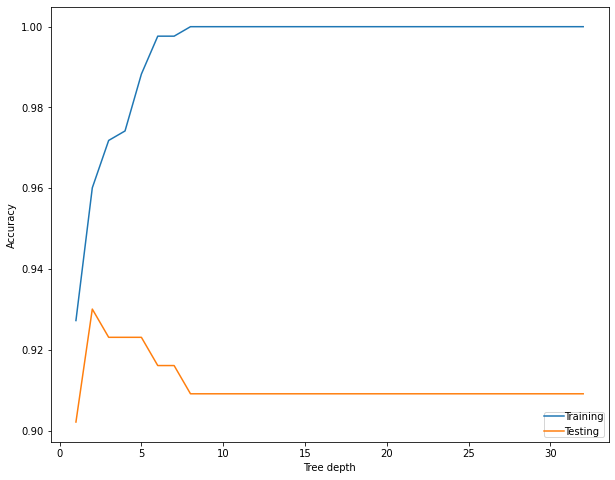

In [92]:
max_depth = np.linspace(1,32,32,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in max_depth:
    clf_dt=tree.DecisionTreeClassifier(max_depth=i, random_state=40)
    clf_dt.fit(X_train,y_train)
    y_train_pred = clf_dt.predict(X_train)
    y_test_pred = clf_dt.predict(X_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(max_depth,accuracy_train)
plt.plot(max_depth,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.legend(['Training', 'Testing'],loc='lower right', borderpad=0, handletextpad=0) 
plt.show()

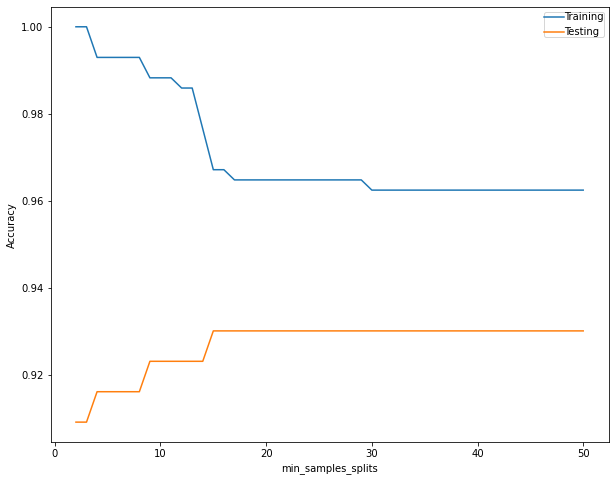

In [93]:
min_samples_split = np.linspace(2, 50, 50,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in min_samples_split:
    clf_dt=tree.DecisionTreeClassifier(min_samples_split=i, random_state=40)
    clf_dt.fit(X_train,y_train)
    y_train_pred = clf_dt.predict(X_train)
    y_test_pred = clf_dt.predict(X_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(min_samples_split,accuracy_train)
plt.plot(min_samples_split,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 
plt.show()


In [94]:
Tuned_tree = tree.DecisionTreeClassifier(random_state=40,max_depth=7, min_samples_split=42)
Tuned_tree.fit(X_train,y_train)
y_train_pred = Tuned_tree.predict(X_train)
y_test_pred = Tuned_tree.predict(X_test)

#Use accuracy metric from sklearn.metrics library
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print('Accuracy Score on test data: ', metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  0.9624413145539906
Accuracy Score on test data:  0.9300699300699301


<Figure size 432x288 with 0 Axes>

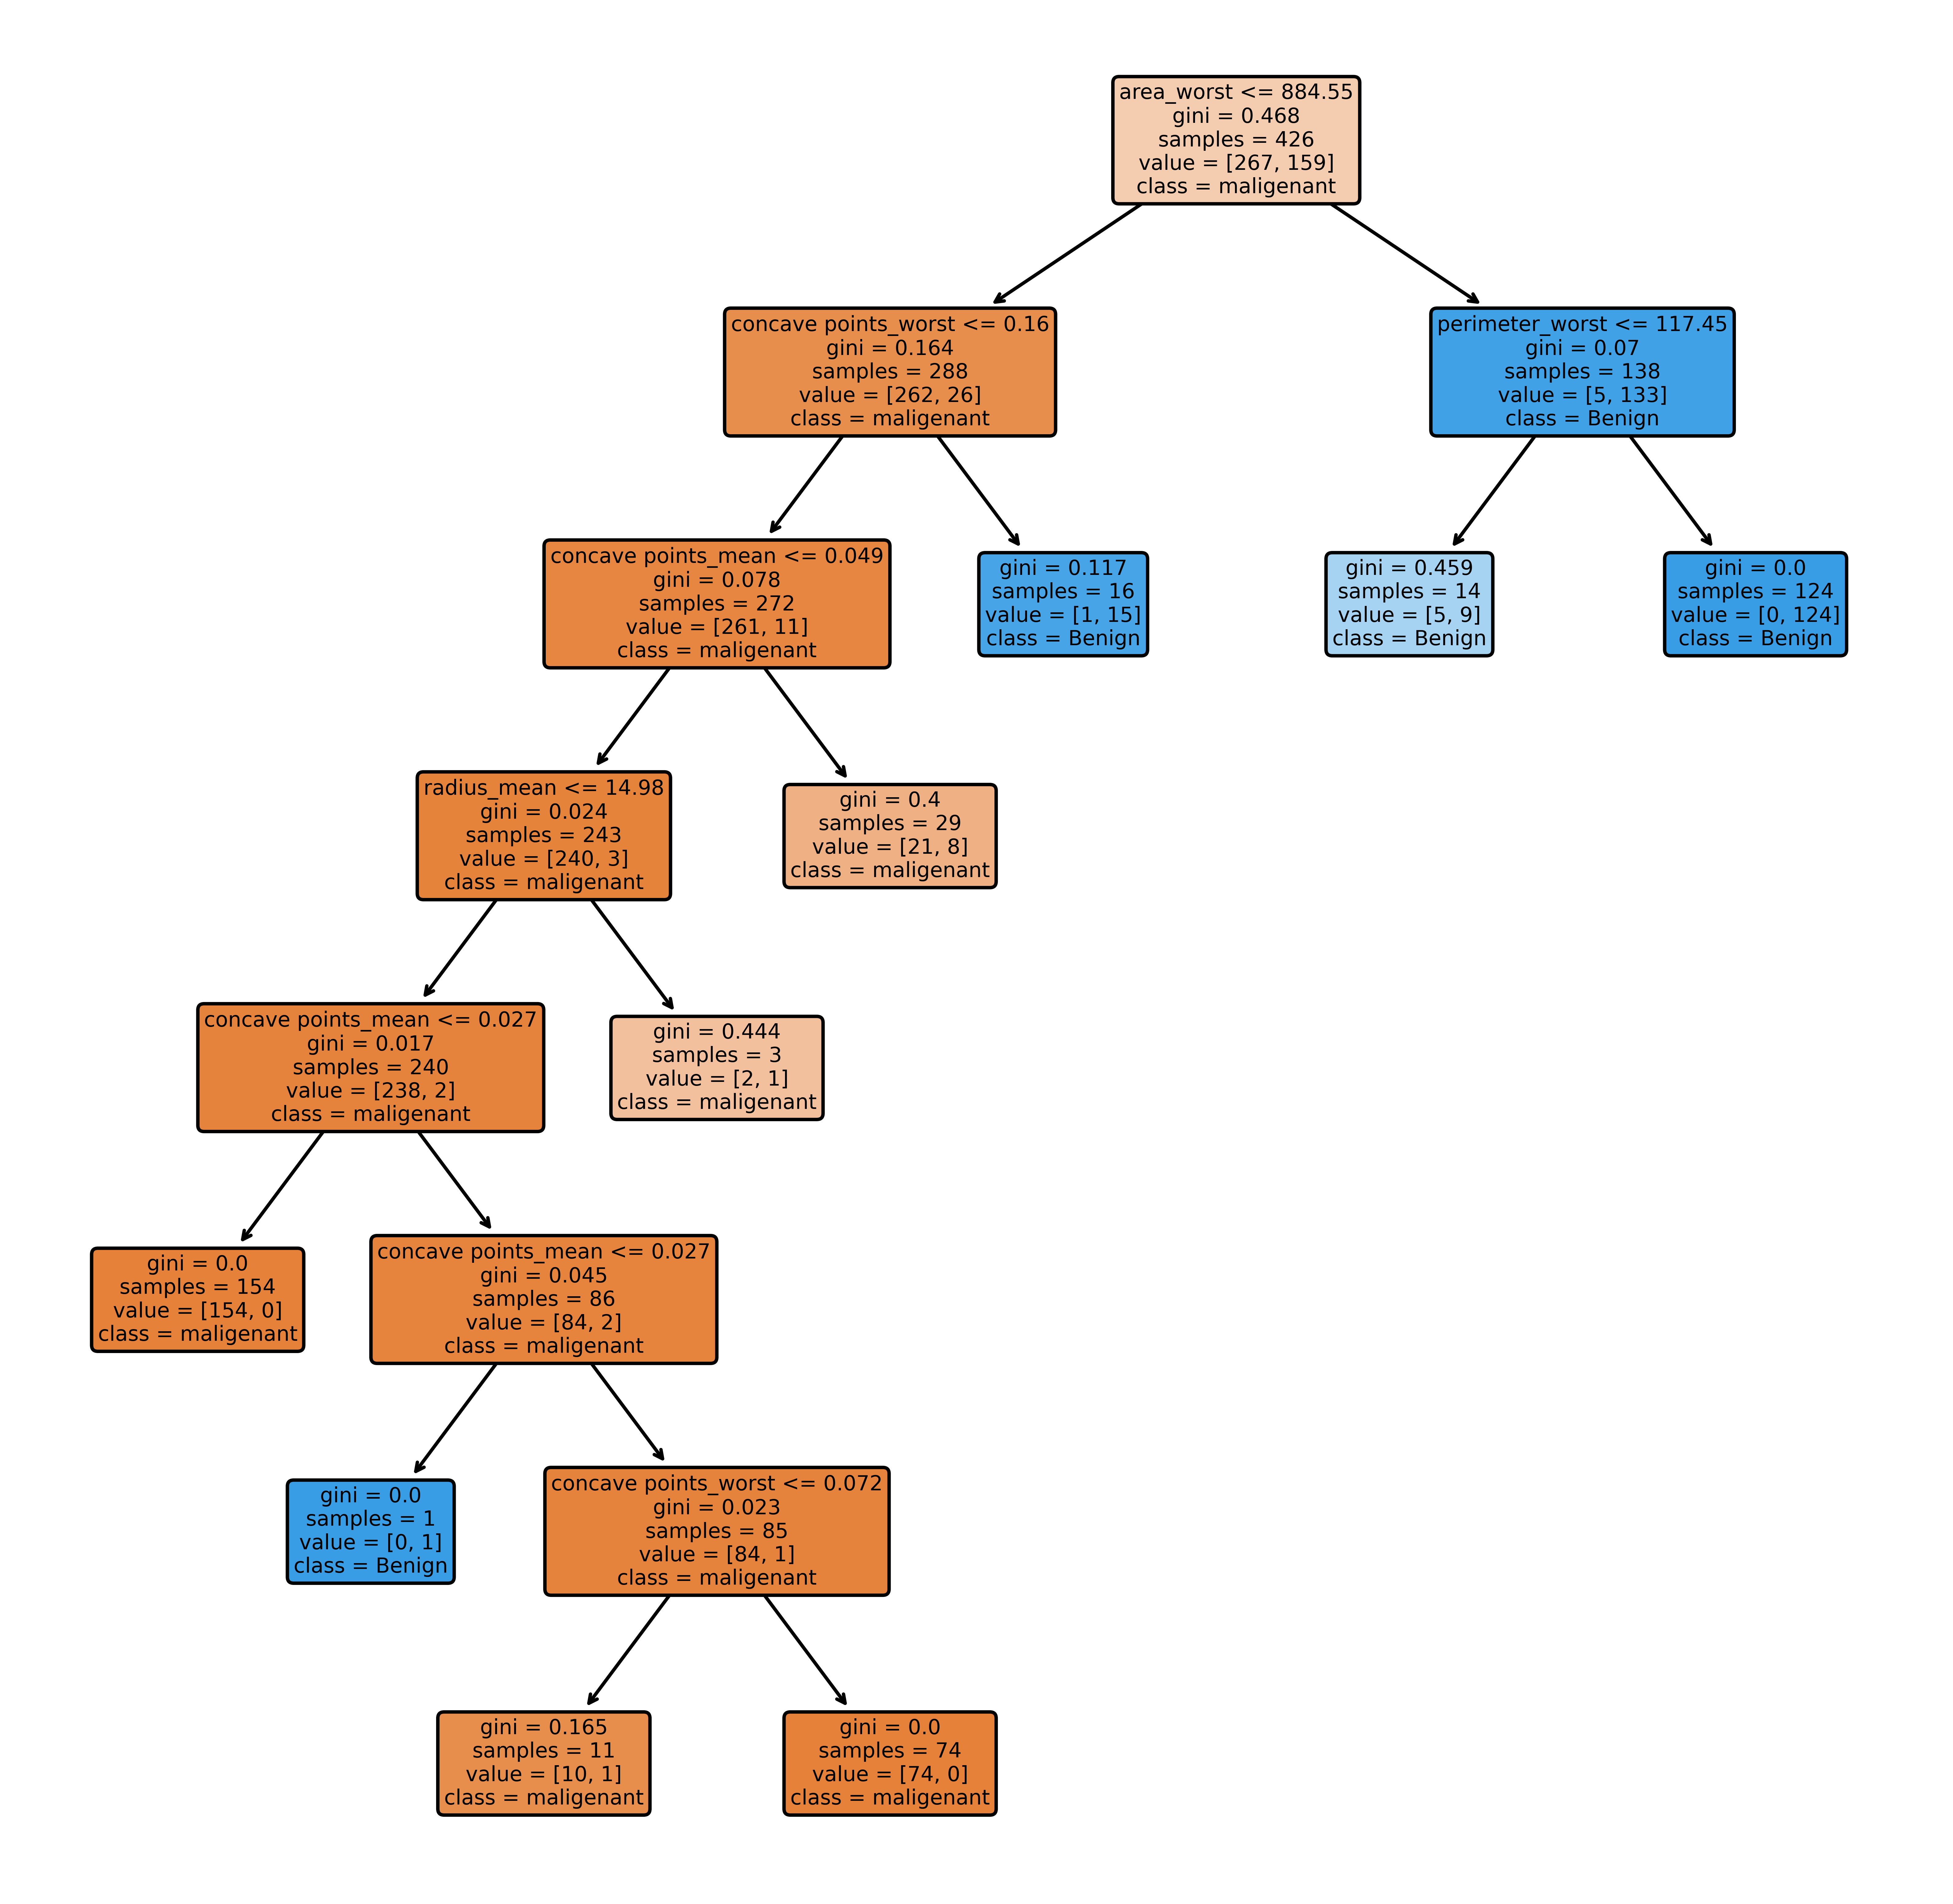

In [95]:
plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(Tuned_tree, feature_names = X.columns.tolist(),
               class_names=['maligenant','Benign'], 
               filled = True,
              rounded=True)
plt.show()

# 3.Random Forest



In [96]:
clf=RandomForestClassifier(random_state=40)

#Train the model using the training sets
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=40)

In [97]:
clf.get_params() 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}

In [98]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [99]:
print('Accuracy Score on train data: ', metrics.accuracy_score(y_train, y_train_pred))
print("Random Forest test Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Accuracy Score on train data:  1.0
Random Forest test Accuracy: 0.9300699300699301


##### Hyperparameter tuning in Random Forest

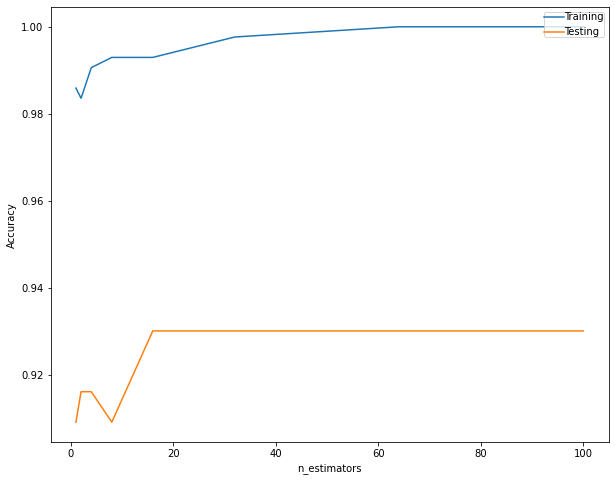

In [100]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100]
accuracy_train,accuracy_test=[],[]

for i in n_estimators:
    clf_rf=RandomForestClassifier(n_estimators=i, random_state=40)
    clf_rf.fit(X_train,y_train)
    y_train_pred = clf_rf.predict(X_train)
    y_test_pred = clf_rf.predict(X_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(n_estimators,accuracy_train)
plt.plot(n_estimators,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0) 
plt.show()


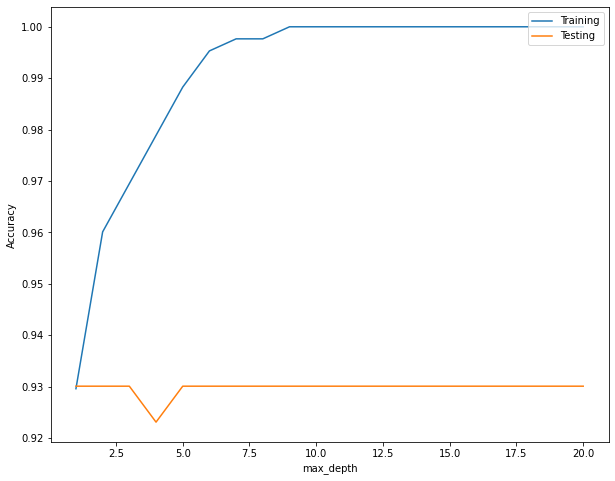

In [101]:
max_depth = np.linspace(1,20,20,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in max_depth:
    clf_rf=RandomForestClassifier(max_depth=i, random_state=40)
    clf_rf.fit(X_train,y_train)
    y_train_pred = clf_rf.predict(X_train)
    y_test_pred = clf_rf.predict(X_test)
    
    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(max_depth,accuracy_train)
plt.plot(max_depth,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend(['Training', 'Testing'],loc='upper right') 
plt.show()

# 4.Logistic Regression

In [117]:
# input
x = final_df.iloc[:, [0, 7]].values
  
# output
y = final_df.iloc[:, 8].values

In [120]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)

In [121]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[-0.36433881 -0.65079907]
 [-1.45036679 -0.82835341]
 [ 0.72504581  1.68277234]
 [-0.96777246 -0.16041087]
 [-0.42582649  0.71326925]
 [-0.98180934 -0.59161428]
 [-0.91116718 -0.08149783]
 [-0.34526696 -0.45069814]
 [ 0.53737871  0.02841677]
 [ 0.91118716 -1.44584797]]


In [122]:
#Train The Model
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [123]:
# time to use it to do predictions on testing data. 
y_pred = classifier.predict(xtest)


In [124]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[85  5]
 [ 5 48]]


In [125]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.9300699300699301
